In [1]:
# show association matrix types, padding counts

# show genearlized eigs and noise

In [2]:
import sys
sys.path.append('..')

%matplotlib inline
import numpy as np

from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting

In [7]:
import pandas as pd
import string

def make_random_data(n_samp=10000, n_feat=100):
    """
    make some random data with correlated features
    """
    data = np.random.randn(n_samp, n_feat)
    
    signal_width = 10
    signal_overlap = 2
    step_size = signal_width - signal_overlap
    for i in range(0, data.shape[1], step_size):
        shared_signal = 0.3*np.random.randn(n_samp, 1)
        data[:, i:(i+signal_width)] += shared_signal
    return data

data = make_random_data()

column_names = [
    "{}{}".format(i, string.lowercase[i % len(string.lowercase)])
    for i in range(data.shape[1])]

df_data = pd.DataFrame(
    data,
    columns=column_names
    )

df_data.head()

,0a,1b,2c,3d,4e,5f,6g,7h,8i,9j,...,90m,91n,92o,93p,94q,95r,96s,97t,98u,99v
0,0.788644,-1.554864,0.362184,0.237770,-0.675626,-0.588343,0.336789,-1.721661,-1.922418,-0.196893,...,-1.621589,0.583397,1.392568,-1.271003,0.954703,0.585951,-1.807696,-0.091396,-0.213871,0.668279
1,-0.017092,0.044824,0.849437,0.804768,1.643062,1.343634,0.914945,0.554250,-0.527681,1.203323,...,-1.273332,0.176206,0.840439,-0.032063,0.705757,-0.795454,0.569188,-1.129664,0.539277,-1.545991
2,-0.267166,-0.262709,-0.077584,-0.185519,2.003074,-0.092378,-0.296480,2.546865,0.245498,0.543400,...,-0.000717,0.490234,-1.367289,-0.389014,-1.526137,1.638120,2.497178,-0.747932,-0.899203,-0.451478
3,-1.672126,-0.323656,0.678533,1.881208,-0.124476,-0.292084,-1.556107,0.760593,-0.889381,0.213697,...,-0.191012,0.507505,0.714530,-0.092508,-0.068433,-0.552873,-0.799248,-0.388082,-0.657261,0.626216
4,0.446216,2.062986,0.653803,0.314301,0.060262,0.081208,0.319385,2.643269,0.550409,-0.115334,...,-1.594834,-0.553853,0.235002,0.317207,-0.429086,-0.552795,-1.143119,-0.349513,-0.025768,2.257377


In [8]:
def run_pipeline(data, retain_method='broken_stick',
                 preproc_demean=True, preproc_scale=True,
                 rotation_method='varimax', **kwargs):

    # Set up the factor analysis object, indiate how to calculate the
    # association matrix out of this input data.

    fa = FactorAnalysis.load_data(
        data,
        preproc_demean=preproc_demean,
        preproc_scale=preproc_scale,
        **kwargs
        )

    # Extract the components
    fa.extract_components()

    # Calculate how many components to retain
    # You can use any of these methods:
    #   'top_n', 'top_pct', 'kaiser', 'broken_stick'

    fa.find_comps_to_retain(
        method=retain_method,
        **kwargs
        )

    # Once you know how many to retain, re-extract with PAF
    fa.reextract_using_paf()

    # Apply factor rotation
    # Right now there are both 'varimax' and 'quartimax'
    fa.rotate_components(
        method=rotation_method
        )

    return fa

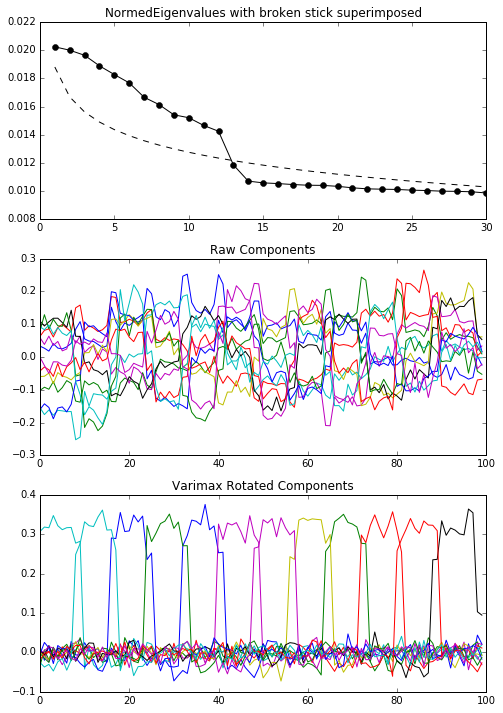

In [9]:
fa_counts = run_pipeline(
    df_data,
    retain_method='broken_stick',
    preproc_scale=True,
    preproc_demean=True
)

fig = fa_plotting.graph_summary(fa_counts)

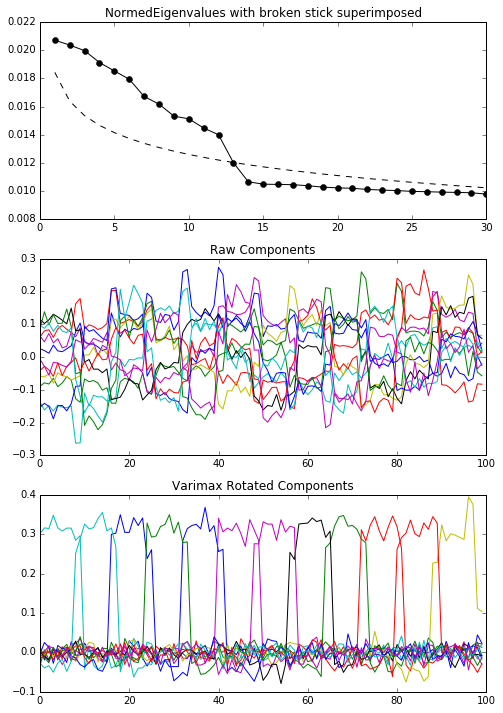

In [11]:
fa_counts = run_pipeline(
    df_data,
    retain_method='broken_stick',
    preproc_scale=False,
    preproc_demean=True
)

fig = fa_plotting.graph_summary(fa_counts)